In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [80]:
v = pd.read_csv('/content/placement (1).csv')

In [81]:
v.head(1)

,cgpa,package
0,6.89,3.26


Text(0, 0.5, 'package')

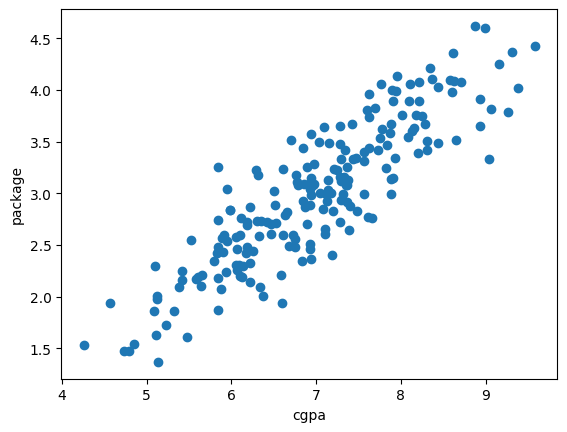

In [82]:
plt.scatter(v['cgpa'] , v['package'])
plt.xlabel('cgpa')
plt.ylabel('package')


In [83]:
x = v.iloc[:,0:1]
y = v.iloc[:,-1]

In [84]:
y.head(1)

,package
0,3.26


In [85]:
x.head(1)

,cgpa
0,6.89


In [86]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [88]:
lr.fit(x_train ,y_train)


LinearRegression()

Text(0, 0.5, 'package')

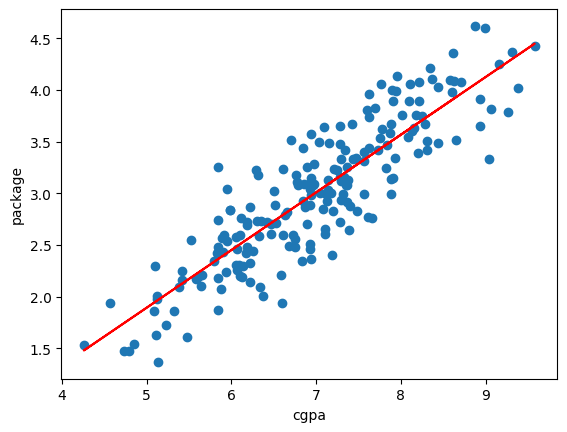

In [89]:
plt.scatter(v['cgpa'] , v['package'])
plt.plot(x_train,lr.predict(x_train) , color = 'red')
# by this line we are drawing the line by which my model
# has been predicting the outputs through the line
# by the use of linear regression...

plt.xlabel('cgpa')
plt.ylabel('package')

In [90]:
from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score



In [91]:
y_pred = lr.predict(x_test)
# here we are passing x_test inouts to predict the y output


In [92]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [93]:
print("MAE" , mean_absolute_error(y_test,y_pred))

# we are finding out the mean absolute erorrs
# MAE means Mean Absolute Error, which measures the
# average absolute difference
# between actual and predicted values.

MAE 0.2884710931878175


In [94]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [95]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [96]:
print("MSE" , r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

# exactly it will till how much our model is efficient ....

# also  it will state that cgpa column is able to expalain
# 78 percent of variance  in that column ...

MSE 0.780730147510384


**Adjusted_r2_score**

In [97]:
#  adjusted r2 score
#  Adjusted R² tells how well your regression model fits the data..
#  just like R², but it also adjusts for the number of features used.

#  it  penalizes the score if you add useless features
#  that don’t improve prediction.
#  means the score will go down if one have added non relevent feature


# So, it gives a more honest performance measure,
# especially when you have many input variables.



x_test.shape

(40, 1)

In [98]:
# this formula is of adjusted r_sqaure will not let u tell
# how efficien regression lins fits at the data but also will
# tell that  about the affect of adding non relevent column
# 1 - ((1-r2)*(40-1)/(40-1-1))

# actually i have directly passed....
# the input before stating the  formula of adjusted_r2_score

# 1 − [(1−Rsqare).n-1/n-k-1]

# actually here n is 40 means there is 40 rows and k is 1 means
# there is only 1 feature



In [99]:
new_v1 = v.copy()
new_v1['random_feature'] = np.random.random(200)
new_v1 = new_v1[['cgpa','random_feature','package']]
new_v1.head()

# here we have made a copy of my data frame and made ...
# some changes by adding extra column ...

# we have added  one extra column or input which are nonrelevent
# just because to check the effects in adjusted r square
# because it penalise the non relevent column by decreasing the
# the efficiency of my model ...


,cgpa,random_feature,package
0,6.89,0.924480,3.26
1,5.12,0.888036,1.98
2,7.82,0.982772,3.25
3,7.42,0.955611,3.67
4,6.94,0.423109,3.57


Text(0, 0.5, 'package')

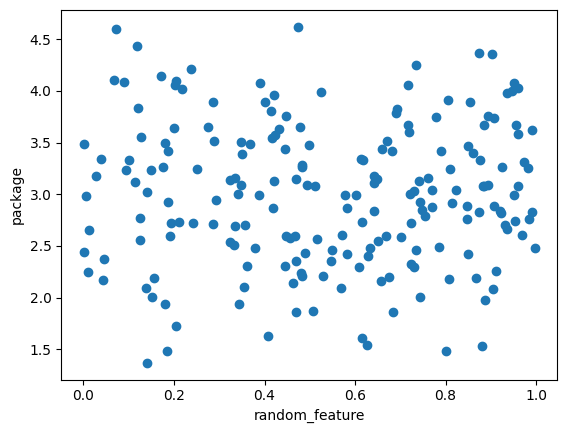

In [100]:
plt.scatter(new_v1['random_feature'] , new_v1['package'])
plt.xlabel('random_feature')
plt.ylabel('package')

# here we have shown scattered plot of mine dataframe ...



In [101]:
x = new_v1.iloc[:,0:2]
y = new_v1.iloc[:,-1]

# just doing all these shit to train test split again
# for new dataframe

In [102]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [103]:
lr = LinearRegression()


In [104]:
lr.fit(x_train,y_train)

LinearRegression()

In [105]:
y_pred = lr.predict(x_test)

In [106]:
print("R2 score" , r2_score(y_test , y_pred))


R2 score 0.7804282301716143


In [107]:
 r2 = r2_score(y_test , y_pred)

# we converted r2 score function in object

In [108]:
1 - ((1-r2)*(40-1)/(40-2-1))

# again we are using adjusted r2 score formula
# but here row is still 40 .... but since we have added extra column
# by which my k value  is now 2...

0.7685594858565665

In [109]:
# now after adding extra non relevent column we have seen the metrics
# and how efficient my model and seen adjusted r_square ....how much it go
# down ...now we added relevent coloumn ....now we wil see the the metrics and
# how much our model is relevent ..... also we cann see the adjusted score too
# how it have gone up.....

new_v2 = v.copy()
new_v2['iq'] = new_v2['package'] + (np.random.randint(-12,12,200)/10)

# here np randit function is  generating 200 integers between
# -12 to 12 .....tota will be 24 but it will keep repeating.....

new_v2 = new_v2[['cgpa','iq','package']]
new_v2.head()


,cgpa,iq,package
0,6.89,4.16,3.26
1,5.12,3.08,1.98
2,7.82,2.35,3.25
3,7.42,2.77,3.67
4,6.94,3.77,3.57


In [110]:
new_v2.sample(5)

,cgpa,iq,package
62,6.34,2.99,2.09
178,8.15,2.53,3.63
196,5.89,3.17,2.57
75,6.97,2.88,3.28
95,6.63,2.79,2.79


Text(0, 0.5, 'package')

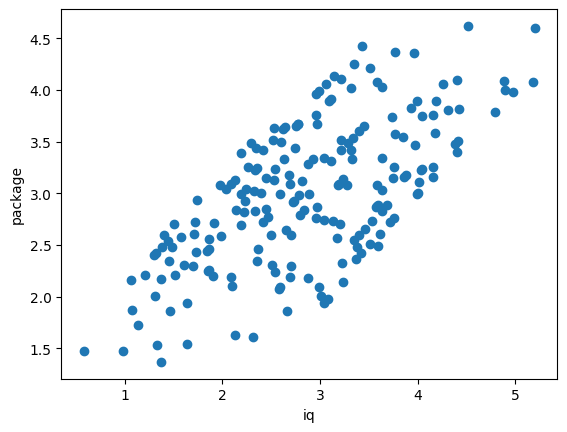

In [111]:
plt.scatter(new_v2['iq'] , new_v2['package'])
plt.xlabel('iq')
plt.ylabel('package')

In [112]:
np.random.randint(-100 ,100)

-54

In [113]:
x = new_v2.iloc[: , 0:2]
y = new_v2.iloc[: , -1]

In [114]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [115]:
lr = LinearRegression()
lr.fit(x_train , y_train)
y_pred = lr.predict(x_test)

In [116]:
print("R2 score" , r2_score(y_test , y_pred))
r2 = r2_score(y_test , y_pred)

R2 score 0.8193109513557042


In [117]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8095439757533098